<h1>Localization Data Intern Test Report - Supercell</h1>

In [30]:
# imports

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Create a SQL connection to our SQLite database
conn = sqlite3.connect("./sample.sqlite")

# Create pandas dataframe from SQL database table 'account'
sql_query_account = pd.read_sql ('''
                               SELECT
                               *
                               FROM account
                               ''', conn)

df_account = pd.DataFrame(sql_query_account)

# Create pandas dataframe from SQL database table 'account_date_session'
sql_query_account_date_session = pd.read_sql ('''
                               SELECT
                               *
                               FROM account_date_session
                               ''', conn)

df_account_date_session = pd.DataFrame(sql_query_account_date_session)

# Create pandas dataframe from SQL database table 'iap_purchase'
sql_query_iap_purchase = pd.read_sql ('''
                               SELECT
                               *
                               FROM iap_purchase
                               ''', conn)

df_iap_purchase = pd.DataFrame(sql_query_iap_purchase)

# Close the connection
conn.close()

In [27]:
# Create an overview of dataframes

df_account.head()

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1
1,4308483975,2016-03-02 20:57:46.14,MIDC147PJ,Android,FR,2
2,17193137415,2016-03-02 13:52:16.735,SM-G360F,Android,IT,2
3,21488104920,2016-03-02 12:43:27.899,H60-L01,Android,CN,8
4,21488107995,2016-03-02 17:20:12.145,GT-I9500,Android,RU,2


In [28]:
df_account_date_session.head()

,account_id,date,session_count,session_duration_sec
0,68730811144,2016-01-01,1,47
1,68730812806,2016-01-01,1,204
2,68730829426,2016-01-01,12,4703
3,68730829426,2016-01-02,9,4676
4,68730829426,2016-01-03,9,2271


In [29]:
df_iap_purchase.head()

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id
0,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0
1,30077202816,2016-05-31 11:24:37.283,dd4c1bda4f2c904075fb2fbfcf30f30e,369,0
2,21487283560,2016-02-13 03:40:28.644,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
3,21487152816,2016-02-28 00:53:26.678,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
4,8602037685,2016-02-11 01:03:04.727,99a9e0e63efa2fdce8fc8de74c66cea9,184,0


<h2>Question 1: Give us short description of datasets.</h2>

<h5>account</h5>

<p>The dataset "account" contains over 100 000 observations of accounts, each containing 6 variables: </p>

<table>
    <tr>
        <td><strong>account_id:</strong></td>
        <td>Identification number for the account</td>
    </tr>
    <tr>
        <td><strong>created_time:</strong></td>
        <td>Date and time the account was created</td>
    </tr>
    <tr>
        <td><strong>created_device:</strong></td>
        <td>The device the account was created on</td>
    </tr>
    <tr>
        <td><strong>created_platform:</strong></td>
        <td>The platform the account was created on</td>
    </tr>
    <tr>
        <td><strong>country_code:</strong></td>
        <td>The ISO code of the country the account was created in</td>
    </tr>
    <tr>
        <td><strong>created_app_store_id:</strong></td>
        <td>ID number of the app store the game was downloaded from</td>
    </tr>
</table>

<h5>account_date_session</h5>
<p>The dataset "account_date_session" contains nearly 1,7 million observations of game sessions made by players. It contains 4 variables:</p>

<table>
    <tr>
        <td><strong>account_id:</strong></td>
        <td>Identification number for the account the sessions were made on</td>
    </tr>
    <tr>
        <td><strong>date:</strong></td>
        <td>Date in which sessions were made</td>
    </tr>
    <tr>
        <td><strong>session_count:</strong></td>
        <td>How many sessions were made by a player in a single day</td>
    </tr>
    <tr>
        <td><strong>session_duration_sec:</strong></td>
        <td>The total duration of the sessions by one player in a single day in seconds</td>
    </tr>
</table>

<h5>iap_purchase</h5>
<p>The dataset "iap_purchase" contains nearly 10 000 observations of in app purchases made by players. It contains 5 variables:</p>

<table>
    <tr>
        <td><strong>account_id:</strong></td>
        <td>Identification number for the account the purchase was made on</td>
    </tr>
    <tr>
        <td><strong>created_time:</strong></td>
        <td>Date and time the purchase was made on</td>
    </tr>
    <tr>
        <td><strong>package_id_hash:</strong></td>
        <td>Hash type identification of the purchased item/product</td>
    </tr>
    <tr>
        <td><strong>iap_price_usd_cents:</strong></td>
        <td>The price of the purchased item in U.S. cents</td>
    </tr>
    <tr>
        <td><strong>app_store_id:</strong></td>
        <td>ID number of the app store the purchase was made in</td>
    </tr>
</table>

<h2>Question 2: Analyse the daily active users</h2>

<i>We'll consider DAU as the number of users that have opened the game at least once on a given day in this report.</i>

<h4>Changes over time</h4>

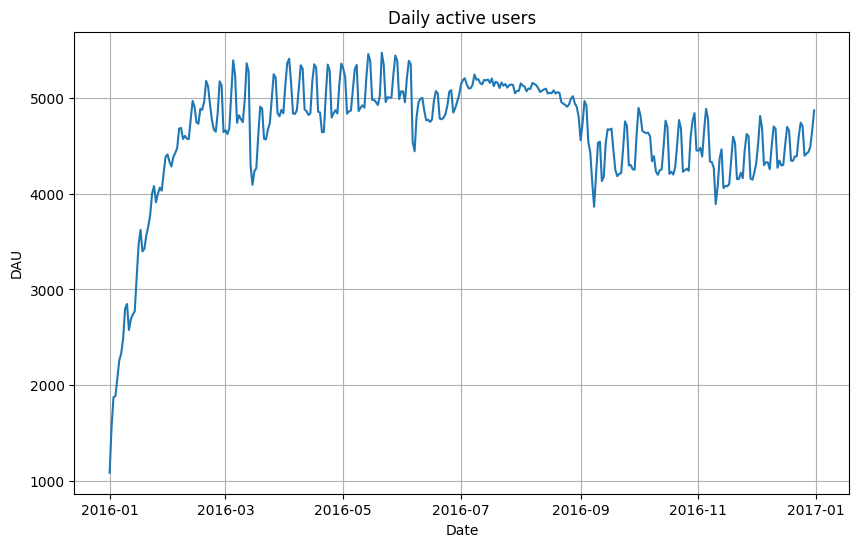

In [53]:
# plot the DAU into a line plot which showcases the change of DAU over time

# the whole year
df_account_date_session['date'] = pd.to_datetime(df_account_date_session['date'])
daily_counts = df_account_date_session.resample('D', on='date').size()

plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('DAU')
plt.title('Daily active users')
plt.grid(True)
plt.show()

<h4>Brief overview</h4>

<p>The DAU rises quickly in the beginning of the year. It steadies around the end of February to around 5 000 DAU. It oscillates around that mark and even rises a little but then suddenly drops in the beginning of June. Then rises back in the middle of July and steadily drops below 5 000 during the end of summer and drops suddenly in the beginning of September. The DAU then continues to oscillate around 4 500 users.</p>

<h4>Trends</h4>

<p>The main trend in the DAU is that it quickly rises to 5 000. Then steadily drops to about 4 500 and flattens around that mark, which seems very normal. The game is first found by people. Then many players try it and then a steady player-base is formed.</p>

<p>The oscillation is due to different weekdays, which we can showcase in the next figure. People have more time to play on the weekends. This also explains the reduced oscillation in the summer when people are on their summer breaks.</p>

steady rise and sudden drop in fall
other sudden drops


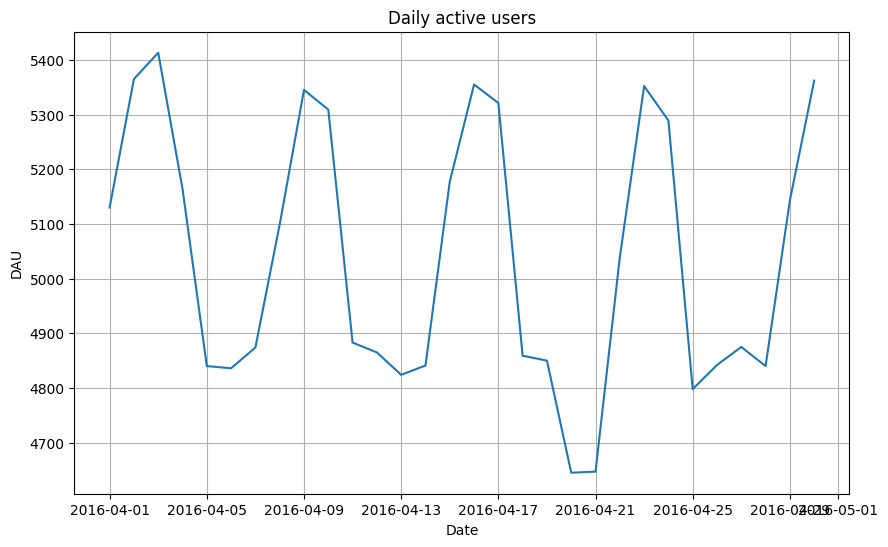

In [54]:
# DAU of april

df_account_date_session_april = df_account_date_session[df_account_date_session['date'].dt.month == 4]
daily_counts = df_account_date_session_april.resample('D', on='date').size()

plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('DAU')
plt.title('Daily active users')
plt.grid(True)
plt.show()